# Logistic Regression | Deep Learning

Können wir unser Beispiel auf ein tiefes neuronales Netz übertragen?

<br>
<img src="../img/komplexe-zusammenhaenge.png" width=70%>
<br>

# Ein tiefes neuronales Netz

<br>
<img src="../img/tnn.png" width = "70%">
<br>

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.warn_explicit = ignore_warn

import pickle
from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from keras.callbacks import ModelCheckpoint, History
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from keras.metrics import RootMeanSquaredError, MeanSquaredError
from matplotlib import pyplot as plt


# Daten aus vorigem Schritt laden

In [2]:
with open('../data/house-prices-advanced-regression-techniques/x_preprocessed_train.pkl', 'rb') as handle:
    X_preprocessed_train = pickle.load(handle)

with open('../data/house-prices-advanced-regression-techniques/y_train.pkl', 'rb') as handle:
    y_preprocessed_train = pickle.load(handle)
    
with open('../data/house-prices-advanced-regression-techniques/x_test.pkl', 'rb') as handle:
    X_preprocessed_test = pickle.load(handle)


# Train Test Split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
seed = 4354 # Random_state ist ein seed, damit gegebenenfalls immer mit der selben pseudo Random Folge gearbeitet wird.
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_train, y_preprocessed_train, test_size=0.2, random_state=seed) 


In [4]:
print ("Anzahl Datensätze in X_train:\t", X_train.shape[0], "\nVektor der Dimension:\t\t", X_train.shape[1])

Anzahl Datensätze in X_train:	 1166 
Vektor der Dimension:		 282


In [5]:
model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[MeanSquaredError()])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               36224     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 201,089
Trainable params: 201,089
Non-trainable params: 0
_________________________________________________________________


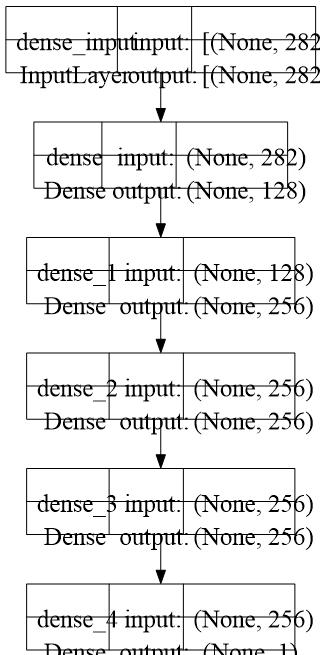

In [6]:
# Tensorflow allows to creat a visual representation of our model.
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='../img/model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
#checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint_name = 'model.weights.best.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
history = History()
callbacks_list = [checkpoint, history]

In [8]:
result = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
30/30 [==============================] - ETA: 0s - loss: 44.9570 - mean_squared_error: 44.9570   
Epoch 1: val_loss improved from inf to 3.87660, saving model to model.weights.best.hdf5
30/30 [==============================] - 1s 9ms/step - loss: 44.9570 - mean_squared_error: 44.9570 - val_loss: 3.8766 - val_mean_squared_error: 3.8766
Epoch 2/500
28/30 [===========================>..] - ETA: 0s - loss: 1.5415 - mean_squared_error: 1.5415
Epoch 2: val_loss improved from 3.87660 to 0.33399, saving model to model.weights.best.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 1.5054 - mean_squared_error: 1.5054 - val_loss: 0.3340 - val_mean_squared_error: 0.3340
Epoch 3/500
28/30 [===========================>..] - ETA: 0s - loss: 0.2857 - mean_squared_error: 0.2857
Epoch 3: val_loss improved from 0.33399 to 0.17814, saving model to model.weights.best.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 0.2823 - mean_squared_error: 0.2823 - val_loss:

In [9]:
history.history['mean_squared_error']

[44.956993103027344,
 1.5054384469985962,
 0.2822992503643036,
 0.1344713270664215,
 0.09202350676059723,
 0.07132424414157867,
 0.05313577875494957,
 0.044965121895074844,
 0.041682254523038864,
 0.03525960445404053,
 0.026842014864087105,
 0.025197746232151985,
 0.02144266851246357,
 0.020450279116630554,
 0.017519285902380943,
 0.015080442652106285,
 0.015674374997615814,
 0.016304180026054382,
 0.012576664797961712,
 0.011238875798881054,
 0.010700184851884842,
 0.009870286099612713,
 0.009413093328475952,
 0.00852990336716175,
 0.009094106033444405,
 0.009727840311825275,
 0.007912514731287956,
 0.00665344949811697,
 0.009744142182171345,
 0.008465859107673168,
 0.010055238381028175,
 0.009828269481658936,
 0.008637587539851665,
 0.007238125428557396,
 0.007968885824084282,
 0.006487579084932804,
 0.006461965851485729,
 0.007534876465797424,
 0.0053715514950454235,
 0.004750688560307026,
 0.005070771090686321,
 0.006383531726896763,
 0.009609267115592957,
 0.011359063908457756,
 0

In [10]:
root_mean_squared_error = np.sqrt(history.history['mean_squared_error'])
val_root_mean_squared_error = np.sqrt(history.history['val_mean_squared_error'])

best_epoch = list (val_root_mean_squared_error).index(min(val_root_mean_squared_error)) + 1
print('Best epoch: %d' % (best_epoch,))
print (f'Best RMSE: {min(val_root_mean_squared_error)}')

Best epoch: 245
Best RMSE: 0.14697899915625717


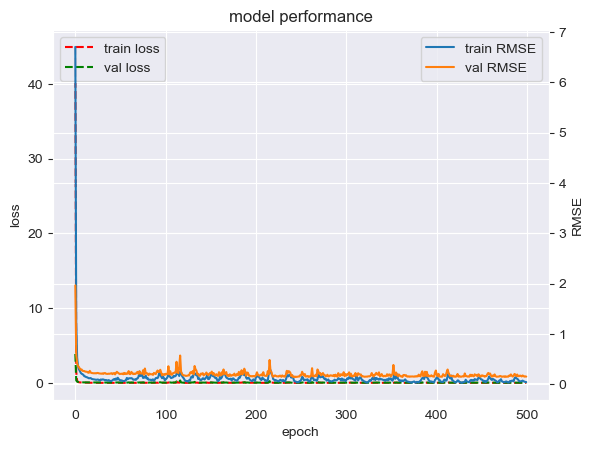

In [11]:
fig, ax1 = plt.subplots()
ax1.plot(history.history['loss'], color='red', linestyle='--')
ax1.plot(history.history['val_loss'], color='green', linestyle='--')
plt.title('model performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss', 'train RMSE', 'varl RMSE'], loc='upper left')

ax2 = ax1.twinx()

ax2.plot(root_mean_squared_error)
ax2.plot(val_root_mean_squared_error)
ax2.set_ylabel('RMSE')
ax2.legend(['train RMSE', 'val RMSE'], loc='upper right')

In [12]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [13]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

# Print test RMSE
print('\n', 'Test RMSE:', np.sqrt(score[1]))


 Test RMSE: 0.20453824323467734


In [14]:
model.metrics_names 

['loss', 'mean_squared_error']

In [15]:
y_hat = model.predict(X_test)
y_hat = y_hat.reshape(y_hat.shape[0])

10/10 [==============================] - 0s 262us/step


In [16]:
rand_vals=np.random.choice(X_test.shape[0], size=15, replace=False)
rand_vals

array([139, 130, 158, 267,  68, 284,  82,  71, 188, 210,  23, 233,  60,
       228,  52])

In [17]:
for i, index in enumerate(rand_vals):
    predict_index = y_hat[index]
    true_index = y_test.to_numpy()[index]
    print (f'{index}: predict={predict_index} / true={true_index}')

139: predict=11.743579864501953 / true=11.635151947212842
130: predict=12.187114715576172 / true=12.160033942617156
158: predict=12.222456932067871 / true=12.144202560946876
267: predict=11.3944730758667 / true=11.440365524765756
68: predict=11.909433364868164 / true=11.571203807011969
284: predict=12.131121635437012 / true=12.116700301832573
82: predict=11.69935417175293 / true=11.774527900858468
71: predict=11.908556938171387 / true=11.904974309480183
188: predict=11.913579940795898 / true=11.693169865968983
210: predict=11.450748443603516 / true=11.373674891823535
23: predict=11.837640762329102 / true=11.88380602959621
233: predict=12.3663330078125 / true=12.429220196836383
60: predict=12.503217697143555 / true=12.396697137361691
228: predict=11.565764427185059 / true=11.580593459194764
52: predict=12.715642929077148 / true=12.721888795877375


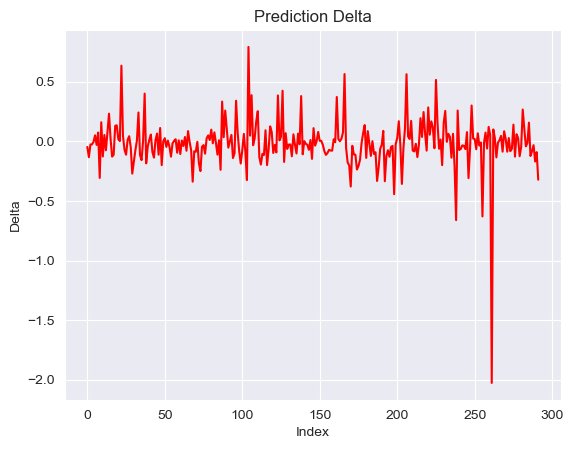

In [18]:
fig, ax1 = plt.subplots()
plt.title('Prediction Delta')
plt.ylabel('Delta')
plt.xlabel('Index')
ax1.plot(np.subtract(y_test.to_numpy(),y_hat), color='red', linestyle='-')